In [1]:
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
def train_algorithm(algorithm, data):
    result = []
    for cluster in range(2, 6):
        model = algorithm(n_clusters=cluster, random_state=1)
        model.fit(data)
        result.append(model)
    
    return result

In [3]:
def print_scores(data, models, algorithm_name):
    print(f'{algorithm_name} Scores')
    for index, model in enumerate(models):
        silhouette_score_value = silhouette_score(data, model.labels_, metric='euclidean', random_state=1)
        calinski_harabasz_score_value = calinski_harabasz_score(data, model.labels_)
        print(f'\tCluster {index + 2}\t\tSilhouette Score: {silhouette_score_value:.2f}\tCalinski Harabasz Score: {calinski_harabasz_score_value:.2f}')
    print()

## housing.csv

In [2]:
housing = pd.read_csv('datasets/housing.csv', usecols=['Longitude', 'Latitude'])

In [3]:
housing.shape

(20640, 2)

In [4]:
housing.head()

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


<Axes: xlabel='Longitude', ylabel='Latitude'>

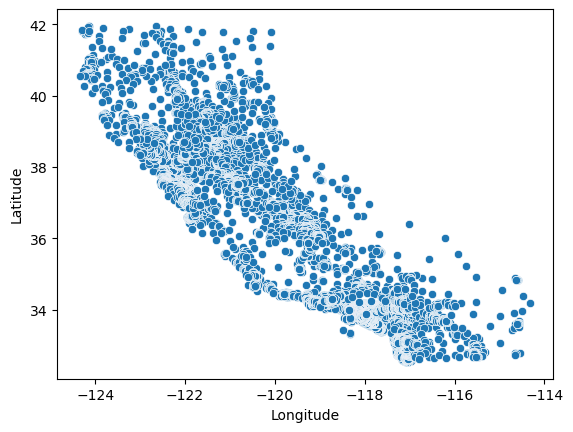

In [5]:
sns.scatterplot(x='Longitude', y='Latitude', data=housing)

In [6]:
housing.isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [8]:
housing_kmeans = train_algorithm(KMeans, housing)

In [9]:
housing_spectral = train_algorithm(SpectralClustering, housing)

In [14]:
print_scores(housing, housing_kmeans, 'KMeans')
print_scores(housing, housing_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.76	Calinski Harabasz Score: 116573.94
	Cluster 3		Silhouette Score: 0.65	Calinski Harabasz Score: 89559.34
	Cluster 4		Silhouette Score: 0.60	Calinski Harabasz Score: 78488.57
	Cluster 5		Silhouette Score: 0.57	Calinski Harabasz Score: 65567.69

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.76	Calinski Harabasz Score: 115736.57
	Cluster 3		Silhouette Score: 0.32	Calinski Harabasz Score: 911.15
	Cluster 4		Silhouette Score: -0.02	Calinski Harabasz Score: 657.06
	Cluster 5		Silhouette Score: -0.04	Calinski Harabasz Score: 699.60



## abalone.csv

In [15]:
abalone = pd.read_csv('datasets/abalone.csv', usecols=['Diameter', 'Height'])

In [17]:
abalone.shape

(4177, 2)

In [18]:
abalone.head()

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080


<Axes: xlabel='Diameter', ylabel='Height'>

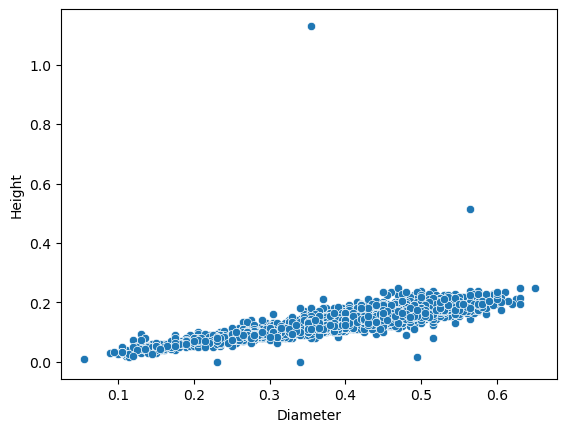

In [48]:
import seaborn as sns
sns.scatterplot(x='Diameter', y='Height', data=abalone)

In [50]:
abalone.isnull().sum()

Diameter    0
Height      0
dtype: int64

In [19]:
abalone_kmeans = train_algorithm(KMeans, abalone)

In [20]:
abalone_spectral = train_algorithm(SpectralClustering, abalone)

In [21]:
print_scores(abalone, abalone_kmeans, 'KMeans')
print_scores(abalone, abalone_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 7616.45
	Cluster 3		Silhouette Score: 0.51	Calinski Harabasz Score: 8549.46
	Cluster 4		Silhouette Score: 0.46	Calinski Harabasz Score: 8741.48
	Cluster 5		Silhouette Score: 0.45	Calinski Harabasz Score: 8951.15

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 7613.21
	Cluster 3		Silhouette Score: 0.57	Calinski Harabasz Score: 4120.04
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 3854.67
	Cluster 5		Silhouette Score: 0.22	Calinski Harabasz Score: 2530.46



## concrete.csv

In [17]:
concrete = pd.read_csv('datasets/concrete.csv', usecols=['Age', 'CompressiveStrength'])

<Axes: xlabel='Age', ylabel='CompressiveStrength'>

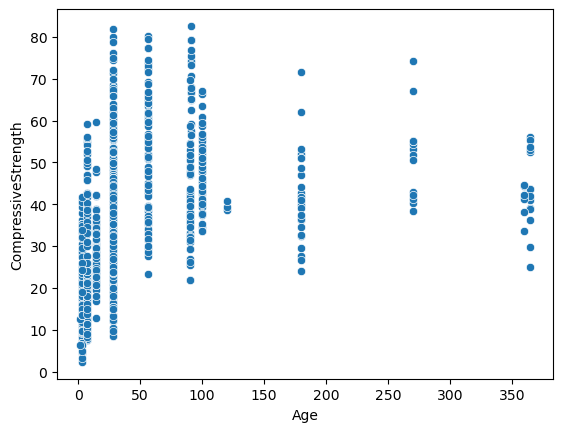

In [18]:
sns.scatterplot(x='Age', y='CompressiveStrength', data=concrete)

In [19]:
concrete.shape

(1030, 2)

In [20]:
concrete.head()

,Age,CompressiveStrength
0,28,79.99
1,28,61.89
2,270,40.27
3,365,41.05
4,360,44.30


In [21]:
concrete.isnull().sum()

Age                    0
CompressiveStrength    0
dtype: int64

In [23]:
concrete_kmeans = train_algorithm(KMeans, concrete)

In [22]:
concrete_spectral = train_algorithm(SpectralClustering, concrete)

In [24]:
print_scores(concrete, concrete_kmeans, 'KMeans')
print_scores(concrete, concrete_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.83	Calinski Harabasz Score: 1632.27
	Cluster 3		Silhouette Score: 0.67	Calinski Harabasz Score: 2751.63
	Cluster 4		Silhouette Score: 0.62	Calinski Harabasz Score: 2868.42
	Cluster 5		Silhouette Score: 0.47	Calinski Harabasz Score: 3242.97

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 4.55
	Cluster 3		Silhouette Score: 0.56	Calinski Harabasz Score: 4.50
	Cluster 4		Silhouette Score: 0.56	Calinski Harabasz Score: 11.39
	Cluster 5		Silhouette Score: 0.56	Calinski Harabasz Score: 8.54



## airbnb.csv

In [2]:
airbnb = pd.read_csv('datasets/airbnb.csv', usecols=['latitude', 'longitude'])

<Axes: xlabel='longitude', ylabel='latitude'>

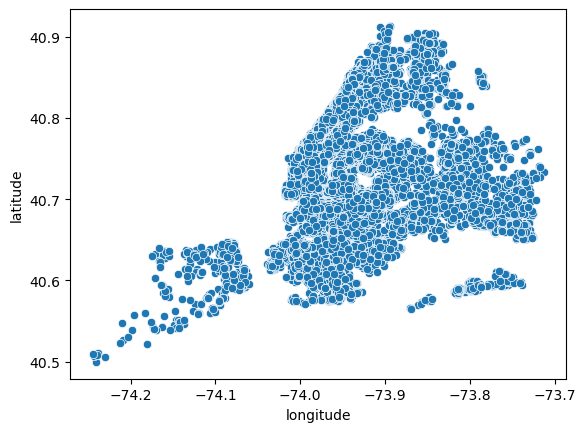

In [3]:
sns.scatterplot(x='longitude', y='latitude', data=airbnb)

In [4]:
# elegir una muestra de 42% de los datos para evitar problemas de memoria
airbnb = airbnb.sample(frac=0.42, random_state=1)

<Axes: xlabel='longitude', ylabel='latitude'>

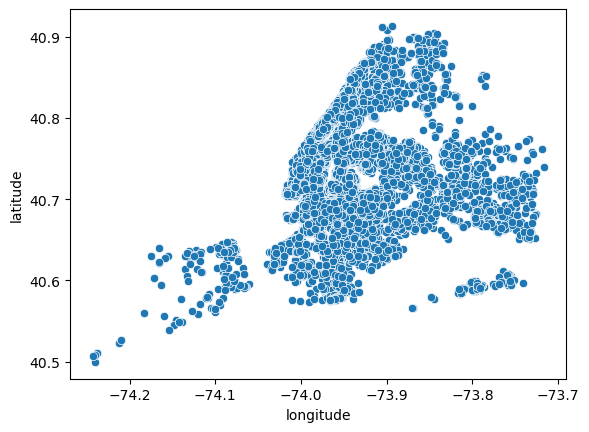

In [5]:
sns.scatterplot(x='longitude', y='latitude', data=airbnb)

In [6]:
airbnb.shape

(20536, 2)

In [7]:
airbnb.head()

,latitude,longitude
18907,40.74596,-73.87762
46663,40.75883,-73.92160
19757,40.69670,-73.97477
9705,40.72435,-73.95154
3322,40.72754,-73.98555


In [21]:
airbnb.isnull().sum()

latitude     0
longitude    0
dtype: int64

In [22]:
airbnb.dtypes

latitude     float64
longitude    float64
dtype: object

In [11]:
airbnb_kmeans = train_algorithm(KMeans, airbnb)

In [10]:
airbnb_spectral = train_algorithm(SpectralClustering, airbnb)

In [12]:
print_scores(airbnb, airbnb_kmeans, 'KMeans')
print_scores(airbnb, airbnb_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.39	Calinski Harabasz Score: 12178.45
	Cluster 3		Silhouette Score: 0.36	Calinski Harabasz Score: 12201.06
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 15170.23
	Cluster 5		Silhouette Score: 0.42	Calinski Harabasz Score: 15756.63

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.39	Calinski Harabasz Score: 12115.21
	Cluster 3		Silhouette Score: 0.43	Calinski Harabasz Score: 13509.16
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 8737.18
	Cluster 5		Silhouette Score: 0.40	Calinski Harabasz Score: 12156.48



## imdb_movies.csv

In [4]:
movies = pd.read_csv('datasets/imdb_movies.csv', usecols=['budget_x', 'revenue'])

<Axes: xlabel='budget_x', ylabel='revenue'>

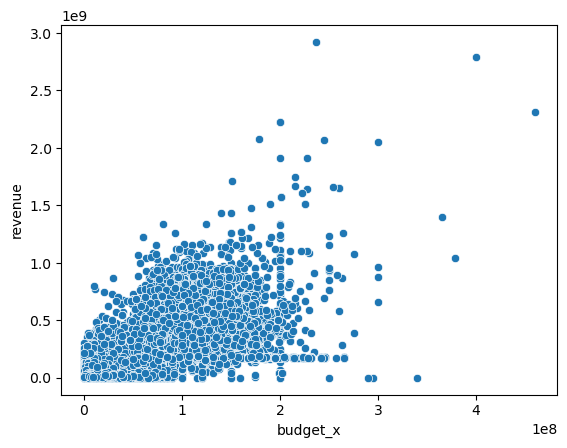

In [5]:
sns.scatterplot(x='budget_x', y='revenue', data=movies)

In [6]:
movies.shape

(10178, 2)

In [8]:
movies.head()

,budget_x,revenue
0,75000000.0,2.716167e+08
1,460000000.0,2.316795e+09
2,100000000.0,7.244590e+08
3,12300000.0,3.420000e+07
4,77000000.0,3.409420e+08


In [9]:
movies.dtypes

budget_x    float64
revenue     float64
dtype: object

In [14]:
movies_kmeans = train_algorithm(KMeans, movies)

In [13]:
movies_spectral = train_algorithm(SpectralClustering, movies)

In [16]:
print_scores(movies, movies_kmeans, 'KMeans')
print_scores(movies, movies_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.66	Calinski Harabasz Score: 22711.57
	Cluster 3		Silhouette Score: 0.62	Calinski Harabasz Score: 24505.83
	Cluster 4		Silhouette Score: 0.60	Calinski Harabasz Score: 26447.72
	Cluster 5		Silhouette Score: 0.59	Calinski Harabasz Score: 28236.59

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.08	Calinski Harabasz Score: 6.90
	Cluster 3		Silhouette Score: 0.07	Calinski Harabasz Score: 3.46
	Cluster 4		Silhouette Score: 0.07	Calinski Harabasz Score: 3.37
	Cluster 5		Silhouette Score: -0.16	Calinski Harabasz Score: 2.65



## All Scores

In [ ]:
print_scores(housing, housing_kmeans, 'KMeans')
print_scores(housing, housing_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.76	Calinski Harabasz Score: 116573.94
	Cluster 3		Silhouette Score: 0.65	Calinski Harabasz Score: 89559.34
	Cluster 4		Silhouette Score: 0.60	Calinski Harabasz Score: 78488.57
	Cluster 5		Silhouette Score: 0.57	Calinski Harabasz Score: 65567.69

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.76	Calinski Harabasz Score: 115736.57
	Cluster 3		Silhouette Score: 0.32	Calinski Harabasz Score: 911.15
	Cluster 4		Silhouette Score: -0.02	Calinski Harabasz Score: 657.06
	Cluster 5		Silhouette Score: -0.04	Calinski Harabasz Score: 699.60



In [ ]:
print_scores(abalone, abalone_kmeans, 'KMeans')
print_scores(abalone, abalone_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 7616.45
	Cluster 3		Silhouette Score: 0.51	Calinski Harabasz Score: 8549.46
	Cluster 4		Silhouette Score: 0.46	Calinski Harabasz Score: 8741.48
	Cluster 5		Silhouette Score: 0.45	Calinski Harabasz Score: 8951.15

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 7613.21
	Cluster 3		Silhouette Score: 0.57	Calinski Harabasz Score: 4120.04
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 3854.67
	Cluster 5		Silhouette Score: 0.22	Calinski Harabasz Score: 2530.46



In [25]:
print_scores(concrete, concrete_kmeans, 'KMeans')
print_scores(concrete, concrete_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.83	Calinski Harabasz Score: 1632.27
	Cluster 3		Silhouette Score: 0.67	Calinski Harabasz Score: 2751.63
	Cluster 4		Silhouette Score: 0.62	Calinski Harabasz Score: 2868.42
	Cluster 5		Silhouette Score: 0.47	Calinski Harabasz Score: 3242.97

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.57	Calinski Harabasz Score: 4.55
	Cluster 3		Silhouette Score: 0.56	Calinski Harabasz Score: 4.50
	Cluster 4		Silhouette Score: 0.56	Calinski Harabasz Score: 11.39
	Cluster 5		Silhouette Score: 0.56	Calinski Harabasz Score: 8.54



In [ ]:
print_scores(airbnb, airbnb_kmeans, 'KMeans')
print_scores(airbnb, airbnb_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.39	Calinski Harabasz Score: 12178.45
	Cluster 3		Silhouette Score: 0.36	Calinski Harabasz Score: 12201.06
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 15170.23
	Cluster 5		Silhouette Score: 0.42	Calinski Harabasz Score: 15756.63

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.39	Calinski Harabasz Score: 12115.21
	Cluster 3		Silhouette Score: 0.43	Calinski Harabasz Score: 13509.16
	Cluster 4		Silhouette Score: 0.41	Calinski Harabasz Score: 8737.18
	Cluster 5		Silhouette Score: 0.40	Calinski Harabasz Score: 12156.48



In [15]:
print_scores(movies, movies_kmeans, 'KMeans')
print_scores(movies, movies_spectral, 'Spectral Clustering')

KMeans Scores
	Cluster 2		Silhouette Score: 0.66	Calinski Harabasz Score: 22711.57
	Cluster 3		Silhouette Score: 0.62	Calinski Harabasz Score: 24505.83
	Cluster 4		Silhouette Score: 0.60	Calinski Harabasz Score: 26447.72
	Cluster 5		Silhouette Score: 0.59	Calinski Harabasz Score: 28236.59

Spectral Clustering Scores
	Cluster 2		Silhouette Score: 0.08	Calinski Harabasz Score: 6.90
	Cluster 3		Silhouette Score: 0.07	Calinski Harabasz Score: 3.46
	Cluster 4		Silhouette Score: 0.07	Calinski Harabasz Score: 3.37
	Cluster 5		Silhouette Score: -0.16	Calinski Harabasz Score: 2.65

